# Walkability in the Neighborhoods of Pittsburgh
## by Mikey Morrissey

**When starting this project, I originally wanted my metric to be environmentally related; however, when I discovered WalkScore's data set I realized something. When people are searching for properties in an urban setting, there is a one key ammentitiy that all purchasers consider: walkability. Owning a car or relying on public transportation can present many challanges, thus walkability to nearby restaurants, grocery stores, green spaces, and various other amentities is highly sought after.**

**The company WalkScore calculated the walkability of any address in Pittsburgh utilizing their patented system:**

    "For each 2010 Census Tract centroid, Walk Score analyzed walking routes to nearby amenities. Points are awarded based on the distance to amenities in each category. Amenities within a 5 minute walk (.25 miles) are given maximum points. A decay function is used to give points to more distant amenities, with no points given after a 30 minute walk. Walk Score also measures pedestrian friendliness by analyzing population density and road metrics such as block length and intersection density. Data sources include Google, Education.com, Open Street Map, the U.S. Census, Localeze, and places added by the Walk Score user community."

In [75]:
import pandas as pd

In [76]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

**Below is a sample of the data collected by WalkScore. As you can see, each US Census Tract is given a walkscore rather than the entire neighborhood. This presented many challenges as some Neighborhoods are made up of many Census Tracts while others are just a single Census Tract.**

In [77]:
# load the walkability data directly from the WPRDC
walkability = pd.read_csv("https://data.wprdc.org/dataset/4d3d4324-b32a-4519-b56f-cee2340057bf/resource/682b1df1-a63b-4413-9362-ba077af63baa/download/walkscorect.xls-walk-score-by-ct.csv")
walkability.head()

,Census Tract,Walk Score
0,10300,82
1,20100,100
2,20300,83
3,30500,77
4,40200,71


**In order to be able to translate the Census Tracts into the various neighborhoods, I found the data for Census Tracks by Neighborhood on Pitt's University Library System (https://pitt.libguides.com/pghcensus/pghcensustracts). I then compiled that information into a readable spreadsheet. Below is a sample of the data. As you can see, most Neighborhoods only have one Census Tract; however, Bloomfield is made up of multiple.**

In [78]:
# loads the spreadsheet containing the neighborhoods and their corresponding census tract(s)
tracts = pd.read_csv("Tracts.csv")
tracts.head(10)

,Neighborhood,Year,Census Tracts
0,Allegheny Center,2010,562700
1,Allentown,2010,180300
2,Banksville,2010,202300
3,Bedford Dwellings,2010,50900
4,Beechview,2010,191600
5,Beltzhoover,2010,562400
6,Bloomfield,2010,80200
7,Bloomfield,2010,80400
8,Bloomfield,2010,80600
9,Bloomfield,2010,80900


**Since some Neighborhoods were made up of multiple Census Tracts, I organized the pandas data frame into a dictionary containing a neighborhood key with an Census Tract(s) array of value(s). Below, the entire dictionary is printed.**

In [79]:
# organizes the spreadsheet data into a dictionary that has a neighborhood key and an array containing the census tract(s)
neighborhood_tracts = dict()
i = 0
while(i < len(tracts)):
    neighborhood_tracts.setdefault(tracts.loc[i]['Neighborhood'],[]).append(tracts.loc[i]['Census Tracts'])
    i += 1
print(neighborhood_tracts)

{'Allegheny Center': [562700], 'Allentown': [180300], 'Banksville': [202300], 'Bedford Dwellings': [50900], 'Beechview': [191600], 'Beltzhoover': [562400], 'Bloomfield': [80200, 80400, 80600, 80900, 90300], 'Bluff': [10300], 'Bon Air': [562400], 'Brighton Heights': [270100, 270300, 270800], 'Brookline': [191700, 191800, 191900, 320600], 'Carrick': [290100, 290200, 290400], 'Central Business District': [20100], 'Central Lawrenceville': [90100, 90200, 981000], 'Central Northside': [220600, 250300], 'Central Oakland': [40500, 40600], 'Crawford-Roberts': [30500], 'Duquesne Heights': [191100], 'East Hills': [130600], 'East Liberty': [111300, 111500], 'Elliott': [562600], 'Fineview': [250900], 'Garfield': [101600, 101700, 111400], 'Greenfield': [151600, 151700], 'Hays': [562900], 'Hazelwood': [562300, 562900], 'Highland Park': [110200, 110600], 'Homewood South': [130300, 130400], 'Homewood West': [120700], 'Larimer': [120400, 120800], 'Lincoln Place': [310200], 'Lincoln-Lemington-Belmar': [1

**Next, I iterated through every Neighborhood's Census Tracts and translated them into the walkability values from the Walkability pandas dataframe. I then added up the walkability values for each Neighborhood and divided it by the total number of values to find the average walkability value for each Neighborhood and stored it in a new dictionary. Below, the entire dictionary is printed.**

In [80]:
# takes the census tract(s) and retrieves the corresponding walkability value for each
# creates a new walkability dictionary that stores each neighborhood and their average walkability from each census tract inside each neighborhood
walkability_d = dict()
for name in neighborhood_tracts.keys(): #iterates through keys
    total = 0 # total walkability = 0
    count = 0 # number of values = 0
    for value in neighborhood_tracts.get(name): # iterates through values for each key
        i = walkability.loc[walkability['Census Tract'] == value].index # gets the row that contains the census tract
        total += walkability['Walk Score'].values[i] # adds the walkability value to the total for the neighborhood
        count += 1 # adds to the number of walkability values for the neighborhood
    walkability_d[name] = round(float(total/count), 2) # stores the neighborhood with it's corresponding walkability
print(walkability_d)

{'Allegheny Center': 86.0, 'Allentown': 63.0, 'Banksville': 48.0, 'Bedford Dwellings': 77.0, 'Beechview': 37.0, 'Beltzhoover': 40.0, 'Bloomfield': 84.4, 'Bluff': 82.0, 'Bon Air': 40.0, 'Brighton Heights': 48.67, 'Brookline': 46.25, 'Carrick': 54.0, 'Central Business District': 100.0, 'Central Lawrenceville': 70.67, 'Central Northside': 86.0, 'Central Oakland': 76.5, 'Crawford-Roberts': 77.0, 'Duquesne Heights': 40.0, 'East Hills': 32.0, 'East Liberty': 74.5, 'Elliott': 42.0, 'Fineview': 54.0, 'Garfield': 62.33, 'Greenfield': 55.5, 'Hays': 18.0, 'Hazelwood': 24.5, 'Highland Park': 52.5, 'Homewood South': 66.5, 'Homewood West': 68.0, 'Larimer': 67.5, 'Lincoln Place': 20.0, 'Lincoln-Lemington-Belmar': 42.25, 'Lower Lawrenceville': 91.0, 'Manchester': 68.0, 'Marshall-Shadeland': 42.67, 'Middle Hill': 60.0, 'Morningside': 40.0, 'Mount Washington': 64.5, 'New Homestead': 2.0, 'North Oakland': 78.5, 'Oakwood': 42.0, 'Perry North': 28.0, 'Perry South': 44.5, 'Point Breeze': 57.67, 'Point Breez

**Reading through this dictionary would give you the necessary data to determine which is the best neighborhood in the city of Pittsburgh; however, I created a bar graph since the information is easier to understand when visuzlized. To make it more readable, the Neighborhood labels were flipped 90 degrees and extra spacing was included to be able to differentiate the bars.**

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

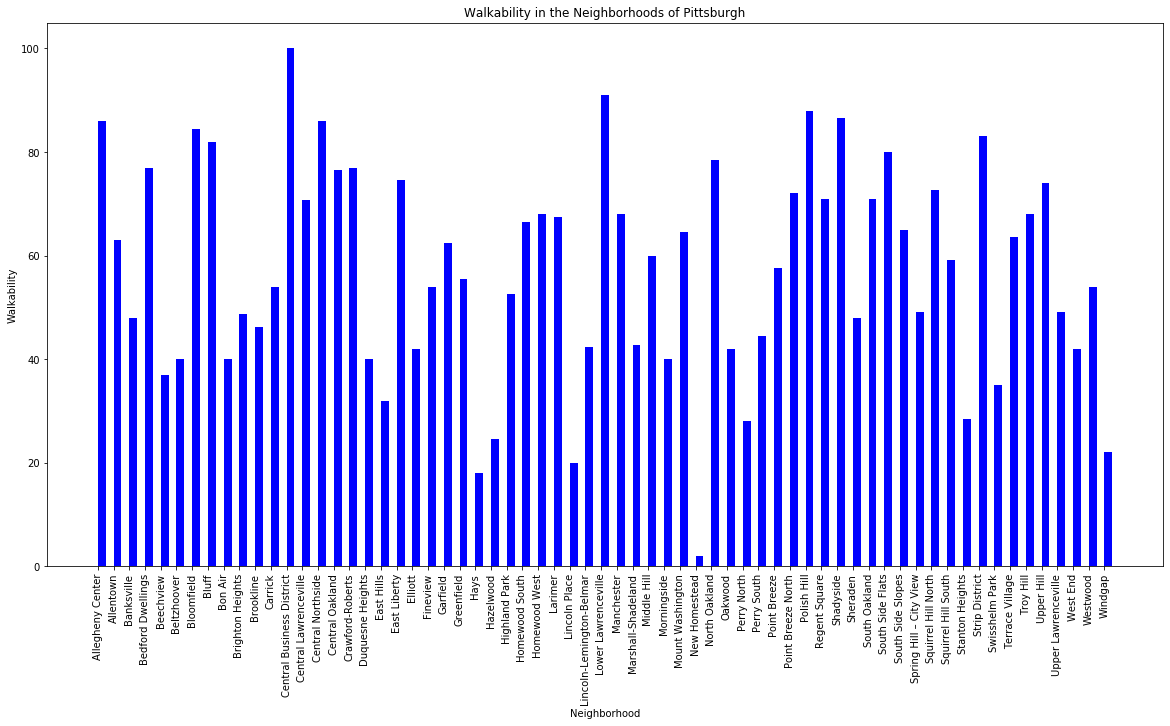

In [82]:
plt.figure(figsize=(20, 10))  # gives extra space and heigh for bars
plt.bar(walkability_d.keys(), walkability_d.values(), align='edge', width=0.5, color="blue") #x = keys, y = values,
plt.xticks(rotation=90) # rotates the Neighborhood labels so they are more easily readable
plt.ylabel("Walkability")
plt.xlabel("Neighborhood")
plt.title("Walkability in the Neighborhoods of Pittsburgh")
plt.show

**We can conclude that the Central Business District is the Best Neighborhood in Pittsburgh and New Homestead is the Worst Neighborhood in Pittsburgh when using the metric of walkability. This result differs from my own opinion of the best Neighborhood in Pittsburgh as I personally prefer Lawerenceville, Squirrel Hill, Shadyside, and Oakland. Nevertheless, this analysis only utilizes one metric. To truly figure out the Best Neighborhood in Pittsburgh you would need to utilize as many metrics as possible and properly weight them.**